# Exploratory Data Analysis with Pandas

In [55]:
import pandas as pd
import numpy as np

# Fetch table data from URL
url = 'https://www.basketball-reference.com/leagues/NBA_2019_per_game.html'
html = pd.read_html(url, header=0)
df2019 = html[0]

# Data cleaning
raw = df2019.drop(df2019[df2019.Age == 'Age'].index)
raw

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1.0,James Harden,29.0,HOU,PG,78.0,78.0,36.8,10.8,24.5,...,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,"MVP-2,AS,NBA1"
1,2.0,Paul George,28.0,OKC,SF,77.0,77.0,36.9,9.2,21.0,...,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,"MVP-3,DPOY-3,AS,NBA1"
2,3.0,Giannis Antetokounmpo,24.0,MIL,PF,72.0,72.0,32.8,10.0,17.3,...,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,"MVP-1,DPOY-2,AS,NBA1"
3,4.0,Joel Embiid,24.0,PHI,C,64.0,64.0,33.7,9.1,18.7,...,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,"MVP-7,DPOY-4,AS,NBA2"
4,5.0,LeBron James,34.0,LAL,SF,55.0,55.0,35.2,10.1,19.9,...,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4,"MVP-11,AS,NBA3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,527.0,Zach Lofton,26.0,DET,SG,1.0,0.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
705,528.0,Kobi Simmons,21.0,CLE,PG,1.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
706,529.0,Tyler Ulis,23.0,CHI,PG,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
707,530.0,Okaro White,26.0,WAS,PF,3.0,0.0,2.0,0.0,0.7,...,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [3]:
raw.shape

(709, 31)

In [4]:
raw.isnull().sum()

Rk          1
Player      0
Age         1
Team        1
Pos         1
G           1
GS          1
MP          1
FG          1
FGA         1
FG%         6
3P          1
3PA         1
3P%        47
2P          1
2PA         1
2P%        15
eFG%        6
FT          1
FTA         1
FT%        43
ORB         1
DRB         1
TRB         1
AST         1
STL         1
BLK         1
TOV         1
PF          1
PTS         1
Awards    653
dtype: int64

In [5]:
df = raw.fillna(0)
df.isnull().sum()

Rk        0
Player    0
Age       0
Team      0
Pos       0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
Awards    0
dtype: int64

In [6]:
df = df.drop(['Rk'], axis=1)
df

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,James Harden,29.0,HOU,PG,78.0,78.0,36.8,10.8,24.5,0.442,...,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,"MVP-2,AS,NBA1"
1,Paul George,28.0,OKC,SF,77.0,77.0,36.9,9.2,21.0,0.438,...,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,"MVP-3,DPOY-3,AS,NBA1"
2,Giannis Antetokounmpo,24.0,MIL,PF,72.0,72.0,32.8,10.0,17.3,0.578,...,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,"MVP-1,DPOY-2,AS,NBA1"
3,Joel Embiid,24.0,PHI,C,64.0,64.0,33.7,9.1,18.7,0.484,...,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,"MVP-7,DPOY-4,AS,NBA2"
4,LeBron James,34.0,LAL,SF,55.0,55.0,35.2,10.1,19.9,0.510,...,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4,"MVP-11,AS,NBA3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,Zach Lofton,26.0,DET,SG,1.0,0.0,4.0,0.0,1.0,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
705,Kobi Simmons,21.0,CLE,PG,1.0,0.0,2.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
706,Tyler Ulis,23.0,CHI,PG,1.0,0.0,1.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
707,Okaro White,26.0,WAS,PF,3.0,0.0,2.0,0.0,0.7,0.000,...,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
df.to_csv('nba2019.csv', index=False)

In [8]:
ls -a

./                               exploratory_data_analysis.ipynb
../                              holidays.csv
.ipynb_checkpoints/              nba2019.csv
Output.csv                       pandas.ipynb
Output.json                      telco_churn.csv


In [9]:
# print file contents to console
# cat nba2019.csv

In [10]:
df = pd.read_csv('nba2019.csv')


### Configure display options

In [11]:
# pd.set_option('display.max_rows', df.shape[0]+1)

In [12]:
df

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,James Harden,29.0,HOU,PG,78.0,78.0,36.8,10.8,24.5,0.442,...,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,"MVP-2,AS,NBA1"
1,Paul George,28.0,OKC,SF,77.0,77.0,36.9,9.2,21.0,0.438,...,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,"MVP-3,DPOY-3,AS,NBA1"
2,Giannis Antetokounmpo,24.0,MIL,PF,72.0,72.0,32.8,10.0,17.3,0.578,...,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,"MVP-1,DPOY-2,AS,NBA1"
3,Joel Embiid,24.0,PHI,C,64.0,64.0,33.7,9.1,18.7,0.484,...,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,"MVP-7,DPOY-4,AS,NBA2"
4,LeBron James,34.0,LAL,SF,55.0,55.0,35.2,10.1,19.9,0.510,...,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4,"MVP-11,AS,NBA3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,Zach Lofton,26.0,DET,SG,1.0,0.0,4.0,0.0,1.0,0.000,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0
705,Kobi Simmons,21.0,CLE,PG,1.0,0.0,2.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
706,Tyler Ulis,23.0,CHI,PG,1.0,0.0,1.0,0.0,0.0,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
707,Okaro White,26.0,WAS,PF,3.0,0.0,2.0,0.0,0.7,0.000,...,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0


### Data type by column

In [13]:
df.dtypes

Player     object
Age       float64
Team       object
Pos        object
G         float64
GS        float64
MP        float64
FG        float64
FGA       float64
FG%       float64
3P        float64
3PA       float64
3P%       float64
2P        float64
2PA       float64
2P%       float64
eFG%      float64
FT        float64
FTA       float64
FT%       float64
ORB       float64
DRB       float64
TRB       float64
AST       float64
STL       float64
BLK       float64
TOV       float64
PF        float64
PTS       float64
Awards     object
dtype: object

 ## Show specific data types 

In [14]:
df.select_dtypes(include=['number'])

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,29.0,78.0,78.0,36.8,10.8,24.5,0.442,4.8,13.2,0.368,...,0.879,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1
1,28.0,77.0,77.0,36.9,9.2,21.0,0.438,3.8,9.8,0.386,...,0.839,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0
2,24.0,72.0,72.0,32.8,10.0,17.3,0.578,0.7,2.8,0.256,...,0.729,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7
3,24.0,64.0,64.0,33.7,9.1,18.7,0.484,1.2,4.1,0.300,...,0.804,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5
4,34.0,55.0,55.0,35.2,10.1,19.9,0.510,2.0,5.9,0.339,...,0.665,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,26.0,1.0,0.0,4.0,0.0,1.0,0.000,0.0,1.0,0.000,...,0.000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
705,21.0,1.0,0.0,2.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
706,23.0,1.0,0.0,1.0,0.0,0.0,0.000,0.0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
707,26.0,3.0,0.0,2.0,0.0,0.7,0.000,0.0,0.7,0.000,...,0.000,0.3,0.3,0.7,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
df.select_dtypes(include=['object'])

,Player,Team,Pos,Awards
0,James Harden,HOU,PG,"MVP-2,AS,NBA1"
1,Paul George,OKC,SF,"MVP-3,DPOY-3,AS,NBA1"
2,Giannis Antetokounmpo,MIL,PF,"MVP-1,DPOY-2,AS,NBA1"
3,Joel Embiid,PHI,C,"MVP-7,DPOY-4,AS,NBA2"
4,LeBron James,LAL,SF,"MVP-11,AS,NBA3"
...,...,...,...,...
704,Zach Lofton,DET,SG,0
705,Kobi Simmons,CLE,PG,0
706,Tyler Ulis,CHI,PG,0
707,Okaro White,WAS,PF,0


## Questions

### Which player scored the most points per game?

In [16]:
max_pts_per_g = df[df.PTS == df.PTS.max()]
max_pts_per_g

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,James Harden,29.0,HOU,PG,78.0,78.0,36.8,10.8,24.5,0.442,...,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,"MVP-2,AS,NBA1"


### What team is the player from?

In [17]:
max_pts_per_g.Team

0    HOU
Name: Team, dtype: object

### Which position does the player hold?

In [18]:
max_pts_per_g.Pos

0    PG
Name: Pos, dtype: object

### How many games was the player in across the season?

In [19]:
max_pts_per_g.G

0    78.0
Name: G, dtype: float64

### Which players scored more than 20 points per game?

In [20]:
greater_than_20_per_g = df[df.PTS > 20]
greater_than_20_per_g

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,James Harden,29.0,HOU,PG,78.0,78.0,36.8,10.8,24.5,0.442,...,0.8,5.8,6.6,7.5,2.0,0.7,5.0,3.1,36.1,"MVP-2,AS,NBA1"
1,Paul George,28.0,OKC,SF,77.0,77.0,36.9,9.2,21.0,0.438,...,1.4,6.8,8.2,4.1,2.2,0.4,2.7,2.8,28.0,"MVP-3,DPOY-3,AS,NBA1"
2,Giannis Antetokounmpo,24.0,MIL,PF,72.0,72.0,32.8,10.0,17.3,0.578,...,2.2,10.3,12.5,5.9,1.3,1.5,3.7,3.2,27.7,"MVP-1,DPOY-2,AS,NBA1"
3,Joel Embiid,24.0,PHI,C,64.0,64.0,33.7,9.1,18.7,0.484,...,2.5,11.1,13.6,3.7,0.7,1.9,3.5,3.3,27.5,"MVP-7,DPOY-4,AS,NBA2"
4,LeBron James,34.0,LAL,SF,55.0,55.0,35.2,10.1,19.9,0.510,...,1.0,7.4,8.5,8.3,1.3,0.6,3.6,1.7,27.4,"MVP-11,AS,NBA3"
5,Stephen Curry,30.0,GSW,PG,69.0,69.0,33.8,9.2,19.4,0.472,...,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,"MVP-5,AS,NBA1"
6,Devin Booker,22.0,PHO,SG,64.0,64.0,35.0,9.2,19.6,0.467,...,0.6,3.5,4.1,6.8,0.9,0.2,4.1,3.1,26.6,0
7,Kawhi Leonard,27.0,TOR,SF,60.0,60.0,34.0,9.3,18.8,0.496,...,1.3,6.0,7.3,3.3,1.8,0.4,2.0,1.5,26.6,"MVP-9,DPOY-6,AS,NBA2"
8,Kevin Durant,30.0,GSW,SF,78.0,78.0,34.6,9.2,17.7,0.521,...,0.4,5.9,6.4,5.9,0.7,1.1,2.9,2.0,26.0,"MVP-8,AS,NBA2"
9,Anthony Davis,25.0,NOP,C,56.0,56.0,33.0,9.5,18.3,0.517,...,3.1,8.9,12.0,3.9,1.6,2.4,2.0,2.4,25.9,AS


### Which player had the most 3-point scores per game?

In [21]:
most_3_point_scores = df[df['3P'] == df['3P'].max()]
most_3_point_scores

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
5,Stephen Curry,30.0,GSW,PG,69.0,69.0,33.8,9.2,19.4,0.472,...,0.7,4.7,5.3,5.2,1.3,0.4,2.8,2.4,27.3,"MVP-5,AS,NBA1"


### Which player had the most assists per game?

In [22]:
most_assists = df[df.AST == df.AST.max()]
most_assists

,Player,Age,Team,Pos,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
18,Russell Westbrook,30.0,OKC,PG,73.0,73.0,36.0,8.6,20.2,0.428,...,1.5,9.6,11.1,10.7,1.9,0.5,4.5,3.4,22.9,"MVP-10,AS,NBA3"


## Group by

### Which Lakers player scored the most points on their team?

In [26]:
lakers = df[df.Team == 'LAL']
player = lakers[lakers.PTS == lakers.PTS.max()]
player.Player

4    LeBron James
Name: Player, dtype: object

### Which position sees the most scored points?

In [31]:
scores_by_pos = df.groupby('Pos').PTS.describe()
scores_by_pos

,count,mean,std,min,25%,50%,75%,max
Pos,,,,,,,,
0,1.0,0.000000,NaN,0.0,0.000,0.00,0.00,0.0
C,121.0,8.770248,5.595484,0.0,4.200,7.70,12.30,27.5
PF,150.0,7.724667,5.626996,0.0,3.325,6.20,11.10,27.7
PG,139.0,8.668345,6.284234,0.0,4.300,7.00,11.05,36.1
SF,122.0,8.272951,5.900400,0.0,4.225,6.70,11.80,28.0
SG,176.0,8.534091,5.746052,0.0,4.000,7.65,11.30,26.6


### Isolate specific positions

In [35]:
guard_types = ['PG', 'SG']
guards = df[df.Pos.isin(guard_types)]
guards.groupby('Pos').describe()

Age                                                         G  \
     count       mean       std   min   25%   50%   75%   max  count   
Pos                                                                    
PG   139.0  26.100719  3.811301  19.0  23.0  26.0  28.0  37.0  139.0   
SG   176.0  25.875000  3.830144  19.0  23.0  26.0  28.0  38.0  176.0   

                ...   PF         PTS                                      \
          mean  ...  75%  max  count      mean       std  min  25%   50%   
Pos             ...                                                        
PG   43.712230  ...  2.1  3.6  139.0  8.668345  6.284234  0.0  4.3  7.00   
SG   42.727273  ...  2.0  3.1  176.0  8.534091  5.746052  0.0  4.0  7.65   

                  
       75%   max  
Pos               
PG   11.05  36.1  
SG   11.30  26.6  

[2 rows x 208 columns]

## Visualization

### Histograms

In [44]:
positions = ['C', 'PF', 'PG', 'SF', 'SG']
pos_df = df[df.Pos.isin(positions)]

pts_by_pos = pos_df[['Pos', 'PTS']]
pts_by_pos

,Pos,PTS
0,PG,36.1
1,SF,28.0
2,PF,27.7
3,C,27.5
4,SF,27.4
...,...,...
703,SF,0.0
704,SG,0.0
705,PG,0.0
706,PG,0.0


array([<Axes: title={'center': 'C'}>, <Axes: title={'center': 'PF'}>,
       <Axes: title={'center': 'PG'}>, <Axes: title={'center': 'SF'}>,
       <Axes: title={'center': 'SG'}>], dtype=object)

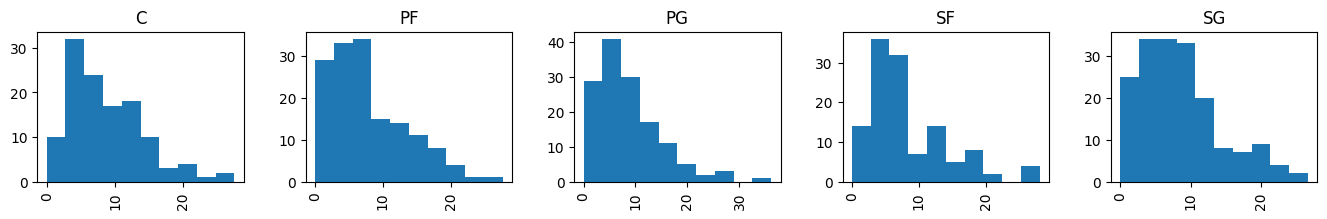

In [48]:
points_hist = pts_by_pos.hist(by=pts_by_pos['Pos'], layout = (1, 5), figsize = (16,2))
points_hist

## Box plot

<Axes: title={'center': 'PTS'}, xlabel='Pos'>

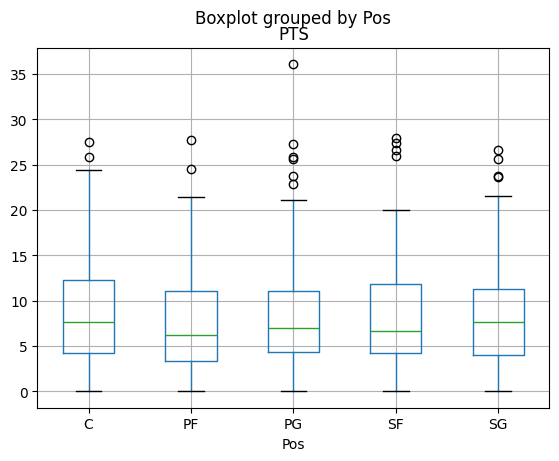

In [50]:
points_box = pts_by_pos.boxplot(column='PTS', by='Pos')
points_box

## Heat Map

### Compute correlation matrix

In [59]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
corr.head()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Age,1.000000,0.079996,0.046125,0.160591,0.069211,0.085226,0.033890,0.171353,0.165518,0.074767,...,0.164248,-0.006603,0.113558,0.082868,0.147294,0.091010,0.020373,0.073895,0.123332,0.092048
G,0.079996,1.000000,0.641780,0.618993,0.542970,0.523706,0.296822,0.397646,0.378234,0.189165,...,0.417560,0.290590,0.443330,0.423467,0.414119,0.406375,0.339854,0.475034,0.478257,0.535873
GS,0.046125,0.641780,1.000000,0.764200,0.724801,0.711980,0.207984,0.497017,0.486276,0.147406,...,0.266553,0.378192,0.599511,0.568136,0.564355,0.567474,0.425170,0.650292,0.538089,0.721159
MP,0.160591,0.618993,0.764200,1.000000,0.871263,0.892577,0.249379,0.687557,0.694577,0.261490,...,0.451729,0.388144,0.696856,0.643662,0.676322,0.735643,0.439846,0.767020,0.732517,0.876070
FG,0.069211,0.542970,0.724801,0.871263,1.000000,0.973433,0.350539,0.605798,0.601831,0.217051,...,0.370360,0.465502,0.723843,0.688381,0.666474,0.636701,0.461056,0.830578,0.625604,0.990043


### Make the heatmap

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

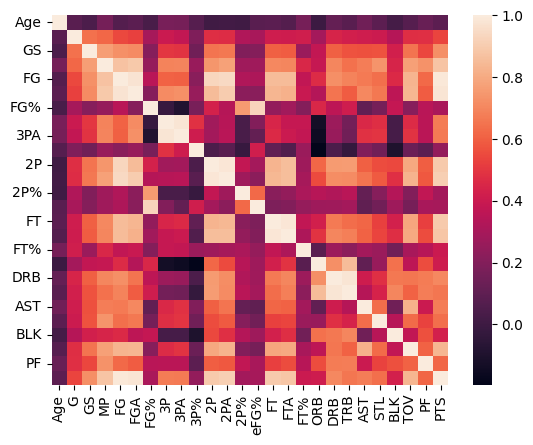

In [64]:
heatmap = sns.heatmap(corr)
heatmap

<Axes: >

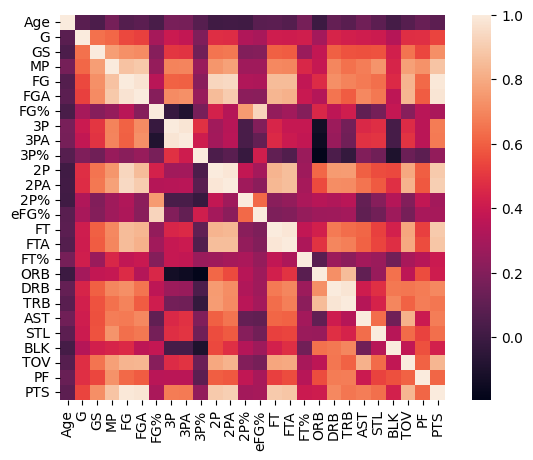

In [67]:
fig, ax = plt.subplots(figsize=(7,5))
heatmap2 = sns.heatmap(corr, square=True)
heatmap2

### Mask diagonal half

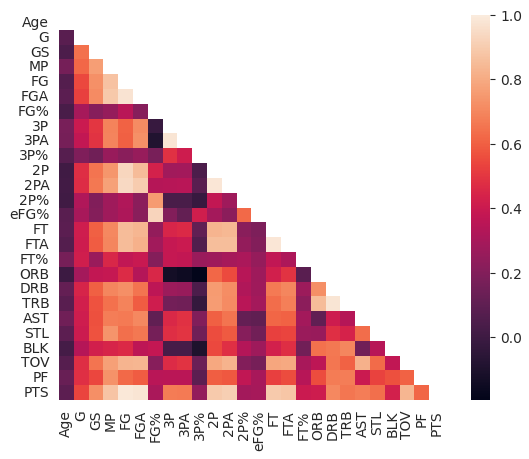

In [72]:
mask = np.zeros_like(corr)
mask[np. triu_indices_from(mask)] = True
with sns.axes_style("white"):
    t, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True)